# 문제정의
- 타이타닉 데이터를 사용해서 생존자와 사망자를 예측해보자
- kaggle 경진대회에서 높은 순위를 차지

# 데이터 수집
- kaggle 사이트로부터 데이터 수집

In [1]:
import pandas as pd
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

- 분석 feature : Pclass, Age, SibSp, Parch, Fare...
- 예측 target label : Survived

- feature 

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer 
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

# 데이터 전처리

## 정답 컬럼 분리

In [2]:
y_train = train['Survived']

## 결측치 확인
- info()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Passengerld 삭제

In [6]:
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [7]:
train.shape, test.shape

((891, 11), (418, 10))

## Embarked 채우기
- 최빈값으로 채우기

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train['Embarked'].fillna('S', inplace = True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Fare 채우기
- 중앙 or 평균 값으로 채우기

In [11]:
##fare값이 float값이 므로 연속적인 실수 데이터다
# 그렇기 때문데 최빈값은 의미가 없다
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [12]:
# 75%와 max값의 차이가 너무 큰 경우는 이상치가 있다
# 그렇기 때문에 이상치에 영향을 덜 받은 중앙값으로 채운다
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [13]:
test['Fare'].fillna(14.4542, inplace = True)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


## Age 채우기
- 다른 컬럼과의 상관관계를 통해서 데이터 채우기

In [15]:
# 수치형 컬럼들간에 상관관계를 확인
# + : 양의 상관관계 -> age가 커지면 다른 컬럼도 커지고 
# - : 음의 상관관계 -> age가 작아지면 다른 컬럼도 커진다
# 1 : 상관도가 높고 0 : 상관도가 낮다
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
# .groupby(by = 'Pclass') : 티켓등급이 같은 데이터들끼리 묶음
age_table = train[['Pclass','Sex','Age']].groupby(by = ['Pclass','Sex']).median()

In [17]:
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [18]:
train.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 5, dtype: object

### age의 결측치를 채워줄 함수 만들기

In [19]:
import numpy as np

In [20]:
def fill_age(person):
    if np.isnan(person['Age']):
        return age_table.loc[person['Pclass'], person['Sex']][0]
    else :
        return person['Age']

In [21]:
# apply : 행이나 열 별로 데이터를 출력하고 지정해둔 함수에 적용
train['Age'] = train.apply(fill_age, axis = 1)

In [22]:
test['Age'] = test.apply(fill_age, axis = 1)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


## Cabin 채우기
- 결측치의 비율이 높기때문에 결측치 자제를 하나의 데이터로 활용

In [24]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
train['Cabin'] = train['Cabin'].str[0]

In [26]:
test['Cabin'] = test['Cabin'].str[0]

In [27]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [28]:
train['Cabin'].fillna('N', inplace = True)
test['Cabin'].fillna('N', inplace = True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 탐색적 데이터 분석

In [30]:
# 시각화 라이브러리
import seaborn as sns

## Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

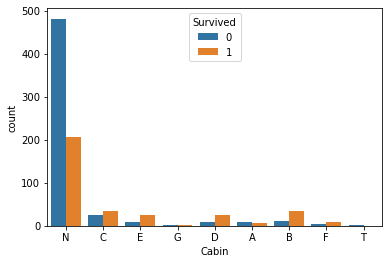

In [31]:
sns.countplot(data = train, x = 'Cabin', hue = 'Survived')

- N에서 사망한 사람의 비율이 높다
- 임의로 채운 N 값을 분석에 사용해도 괜찮을 듯

## Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

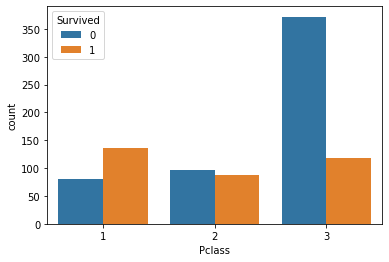

In [32]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

## Embarked와 Pclass 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

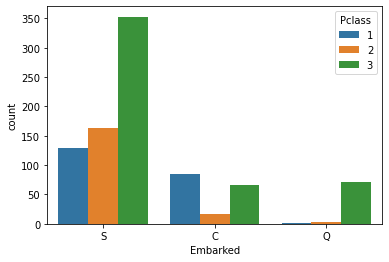

In [33]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')

## Sex, Age, Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

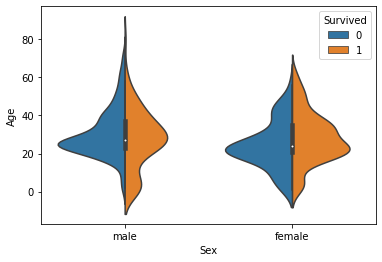

In [34]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True )

## Sibsp, Parch 시각화
- 특성공학 : 컬럼에 연산을 통해서 의미 있는 새로운 정보를 추출하는 행위
- Sibdp + Parch + 1 = Family_size 컬럼 생성

In [35]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [36]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

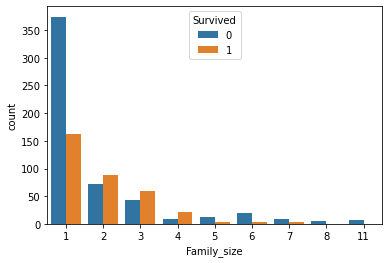

In [37]:
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')

In [38]:
# 0초과 1이하  -> Alone
# 1초과 4이하  -> Small
# 4초과 20이하 -> Large
bins = [0, 1, 4, 20] # 구간정보
labels = ['Alone', 'Small', 'Large'] # 구간에 대한 범주 이름

In [41]:
train['Family_group'] = pd.cut(train['Family_size'], bins = bins, labels = labels)
test['Family_group'] = pd.cut(test['Family_size'], bins = bins, labels = labels)

In [42]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone


### Family_group 시각화

<AxesSubplot:xlabel='Family_group', ylabel='count'>

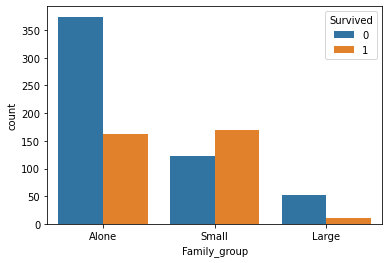

In [43]:
sns.countplot(data = train, x = "Family_group", hue = 'Survived')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Family_size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


## Text 데이터
- Name, Ticket
- 비정형 데이터(사용하는 단어나 길이가 전부 다름)
- 비정형 데이터를 정형 데이터로 변경해서 사용할 수 있게 하자

In [50]:
train['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

### Name 전처리 함수 만들기

In [51]:
def split_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [53]:
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [54]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [55]:
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Dr', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [57]:
train['Name'] = train["Name"].map(convert_title_dic)

In [61]:
test['Name'] = test["Name"].map(convert_title_dic)

In [58]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

In [62]:
test['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       4
Rev         2
Dr          1
Name: Name, dtype: int64

### Ticket 전처리

In [63]:
len(train['Ticket'].unique())

681

In [64]:
train.drop('Ticket', axis = 1 , inplace = True)
test.drop('Ticket', axis = 1 , inplace = True)

In [66]:
train.shape, test.shape

((891, 12), (418, 11))

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Cabin         891 non-null    object  
 9   Embarked      891 non-null    object  
 10  Family_size   891 non-null    int64   
 11  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


## 글자 데이터를 숫자 데이터로 변경
- 원핫 인코딩
- Name, Sex, Cabin, Emabarked, Family_group

In [68]:
categrical_feature = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [69]:
train.drop('Survived', axis = 1 , inplace = True)

In [70]:
combined = pd.concat([train, test], ignore_index = True)

In [72]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone
1305,1,Other,female,39.0,0,0,108.9000,C,C,1,Alone
1306,3,Mr,male,38.5,0,0,7.2500,N,S,1,Alone
1307,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone


In [74]:
# 원핫인코딩
one_hot = pd.get_dummies(combined[categrical_feature])
one_hot.shape

(1309, 24)

In [75]:
combined.drop(categrical_feature, axis = 1, inplace = True)

In [76]:
combined = pd.concat([combined, one_hot] , axis = 1)

In [81]:
combined

,Pclass,Age,SibSp,Parch,Fare,Family_size,Name_Dr,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_group_Alone,Family_group_Small,Family_group_Large
0,3,22.0,1,0,7.2500,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,25.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1305,1,39.0,0,0,108.9000,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1306,3,38.5,0,0,7.2500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1307,3,25.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [77]:
combined.shape

(1309, 30)

# 모델 선택 및 하이퍼 파라미터 튜닝

## 데이터 나누기

In [78]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [80]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))

## 모델 불러오기

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
tree_model = DecisionTreeClassifier()

In [84]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
pre = tree_model.predict(X_test)

In [86]:
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [88]:
gender_sub = pd.read_csv('./data/titanic/gender_submission.csv')
gender_sub['Survived'] = pre # 모델의 예측결과를 제출 양식에 담기
gender_sub.to_csv('mysub01.csv', index = False) # csv파일로 뽑아내기

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'max_depth' : range(1,10),
    'max_leaf_nodes' : range(10,20)
}

In [91]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [92]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(10, 20)})

In [93]:
grid.best_score_

0.8260184545853997

In [94]:
grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 11}

In [95]:
tree_model1 = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 11)

In [96]:
tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=11)

In [99]:
pre1 = tree_model1.predict(X_test)

In [100]:
gender_sub['Survived'] = pre1 # 모델의 예측결과를 제출 양식에 담기
gender_sub.to_csv('mysub02.csv', index = False)

## 교차검증

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
result = cross_val_score(tree_model, X_train, y_train, cv = 5)
result.mean()

0.7856255100119265

In [103]:
tree_model.score(X_train, y_train)

0.9865319865319865

## RandomForest

In [105]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200) # 200 개의  DecisionTree 사용

In [106]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [108]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.7990898248697508

In [109]:
param_grid = {
    'n_estimators' : range(1,300),
}

In [110]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)

In [111]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 300)})

In [112]:
grid.best_score_

0.8114430983616849

In [113]:
grid.best_params_

{'n_estimators': 69}

In [114]:
forestModel = RandomForestClassifier(n_estimators = 69)

In [115]:
forestModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=69)

In [120]:
forestModel.score(X_train, y_train)

0.9865319865319865

In [117]:
forestModel.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [118]:
gender_sub['Survived'] = pre # 모델의 예측결과를 제출 양식에 담기
gender_sub.to_csv('mysub02.csv', index = False)

In [137]:
forest.feature_importances_

array([0.05821498, 0.19995946, 0.0226368 , 0.01827313, 0.20615138,
       0.03214789, 0.00182095, 0.01266528, 0.02553733, 0.09991821,
       0.0190335 , 0.00251855, 0.00219027, 0.07028399, 0.08940259,
       0.00241604, 0.00642094, 0.00739412, 0.00665663, 0.00924696,
       0.00153431, 0.0014099 , 0.02935949, 0.00027952, 0.01247035,
       0.00771065, 0.01285698, 0.007983  , 0.01782223, 0.01568456])

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# 특성 중요도 시각화 하기
def plot_feature_importances(model, n_features):
    # 축 번호별로 중요도 그래프를 그림
    plt.barh(range(n_features), model.feature_importances_)
    # 축 번호에 축 이름을 출력
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

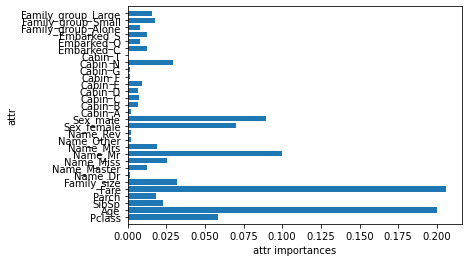

In [139]:
plot_feature_importances(forest, X_train.shape[1])

## Adaboost

In [145]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [141]:
adaboost = AdaBoostClassifier(n_estimators=200)

In [142]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [143]:
result = cross_val_score(adaboost, X_train, y_train, cv = 5)
result.mean()

0.8159625886636117

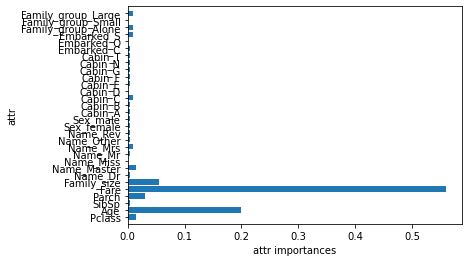

In [144]:
plot_feature_importances(adaboost, X_train.shape[1])

In [ ]:
# boost가 좀더 불안정한 모델이라고 한다
# 그래서 일반적으로 Random Forest을 사용한다
# 하지만 adaboost는 괜탆은 모델이라고 함

In [146]:
gradboost = GradientBoostingClassifier(n_estimators=200)

In [147]:
gradboost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [148]:
result = cross_val_score(gradboost, X_train, y_train, cv = 5)
result.mean()

0.8406251961584333

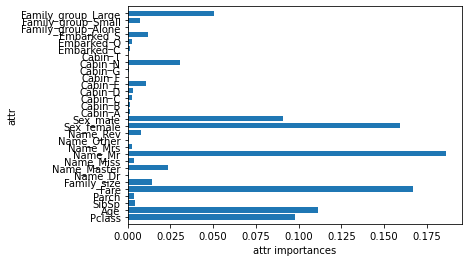

In [149]:
plot_feature_importances(gradboost, X_train.shape[1])

# 데이터 스케일링

In [121]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [122]:
rb_scaler = RobustScaler()

In [123]:
rb_scaler.fit(X_train) # 어떤 컬럼에는 어떤 값으로 변경해야하는지

RobustScaler()

In [124]:
X_train_rb = rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)

In [125]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Name_Dr,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_group_Alone,Family_group_Small,Family_group_Large
0,3,22.0,1,0,7.2500,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [126]:
X_train_rb[:5]

array([[ 0.        , -0.27586207,  1.        ,  0.        , -0.3120106 ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.        ,  1.        ,  0.        ],
       [-2.        ,  0.82758621,  1.        ,  0.        ,  2.46124229,
         1.        ,  0.        ,  0.        ,  0.        , -1.        ,
         1.        ,  0.        ,  0.        ,  1.        , -1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.        ,  0.        ,  1.        ,
         0.        , -1.        , -1.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.28277666,
         0.        ,  0.        ,  0.        ,  1

In [132]:
st_scaler = StandardScaler()

In [133]:
st_scaler.fit(X_train)

StandardScaler()

In [134]:
X_train_st = st_scaler.transform(X_train)
X_test_st = st_scaler.transform(X_test)

## RandomForest 모델 확인

In [128]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.7946017199171427

In [127]:
# RobustScaler 타입
result = cross_val_score(forest, X_train_rb, y_train, cv = 5)
result.mean()

0.8024417801770134

In [135]:
# StandardScaler 타입
result = cross_val_score(forest, X_train_st, y_train, cv = 5)
result.mean()

0.7923545289059069

## KNN 모델 확인

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [130]:
result = cross_val_score(knn_model, X_train, y_train, cv = 5)
result.mean()

0.7250706170359676

In [131]:
# RobustScaler 타입
result = cross_val_score(knn_model, X_train_rb, y_train, cv = 5)
result.mean()

0.8081162513338773

In [136]:
# StandardScaler 타입
result = cross_val_score(knn_model, X_train_st, y_train, cv = 5)
result.mean()

0.7968426338585148